In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('Housing.csv')
dataframe.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,years
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,29
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,49
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5,42
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,22
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,14
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0.5,45
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0.5,42
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0.0,15
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1.0,35
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0.0,27


In [26]:
dataframe.isna().sum()
print(dataframe.shape)

(545, 14)


In [39]:
X = dataframe.iloc[:,1:]
y = dataframe.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

dt_reg1  = DecisionTreeRegressor(max_depth=3)
dt_reg1.fit(X_train_scale,y_train)
y_pred1 = dt_reg1.predict(X_test_scale)

print(y_pred1)

[ 6061125.          7032826.18181818  4069085.61643836  4069085.61643836
  4069085.61643836  5245901.31578947  5245901.31578947  6061125.
  3284130.20833333  4069085.61643836 11083333.33333333  3284130.20833333
  3284130.20833333  4069085.61643836  3284130.20833333  4684944.44444444
  4069085.61643836  5245901.31578947  3284130.20833333  5245901.31578947
  3284130.20833333  5245901.31578947  3284130.20833333  3284130.20833333
  5245901.31578947  7032826.18181818  3284130.20833333  4684944.44444444
  5245901.31578947  4069085.61643836  4684944.44444444  3284130.20833333
  7032826.18181818  5245901.31578947  3284130.20833333  6061125.
  4069085.61643836  3284130.20833333  3284130.20833333  4684944.44444444
  5245901.31578947  3284130.20833333  7032826.18181818  4069085.61643836
  5245901.31578947  3284130.20833333  7032826.18181818  4069085.61643836
  5245901.31578947  3284130.20833333  7032826.18181818  3284130.20833333
  5245901.31578947  4069085.61643836  3284130.20833333  4069085.616

In [40]:
generic_feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

In [45]:

from sklearn.tree import export_graphviz

export_graphviz(dt_reg1, out_file ='tree1.dot',
feature_names=generic_feature_names)

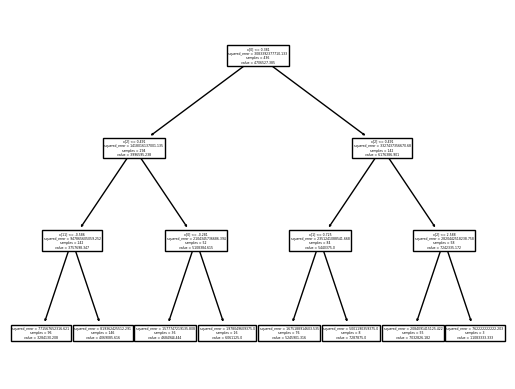

In [47]:
from sklearn import tree


tree.plot_tree(dt_reg1)
plt.savefig('housing1.png')
plt.show()


In [43]:
from sklearn.metrics import r2_score

acc1 = r2_score(y_test,y_pred1)
print('Accuracy: ',acc1*100)

Accuracy:  37.6247937020414


In [48]:
from sklearn.tree import DecisionTreeClassifier


dt_clf2 = DecisionTreeClassifier(max_depth=4)
dt_clf2.fit(X_train_scale,y_train)
y_pred2 = dt_clf2.predict(X_test_scale)

print(y_pred2)

[3990000 5950000 3500000 3500000 3500000 5950000 6930000 3500000 2940000
 2940000 5250000 3430000 2940000 3150000 3430000 4200000 3850000 5950000
 3430000 4270000 4200000 5950000 3430000 3430000 5250000 5250000 3430000
 3500000 6930000 3500000 3500000 3430000 5950000 5950000 3430000 3500000
 3500000 4200000 2940000 3500000 5250000 4200000 5950000 3500000 4270000
 4200000 5950000 3500000 5250000 3430000 5250000 3430000 6930000 3990000
 3430000 2940000 4200000 3430000 5950000 3430000 3500000 4200000 4270000
 4200000 3430000 3500000 4270000 3430000 5250000 3500000 3150000 5950000
 6930000 6930000 4200000 3500000 3500000 3500000 5950000 2940000 5950000
 3500000 3500000 5950000 3430000 3430000 3430000 3500000 3500000 5950000
 3150000 6930000 3500000 2940000 6930000 3500000 3500000 4200000 3430000
 5950000 3500000 3500000 3500000 3500000 5950000 5950000 5950000 5950000
 5950000]


In [49]:
export_graphviz(dt_clf2, out_file ='tree2.dot',
feature_names=generic_feature_names)

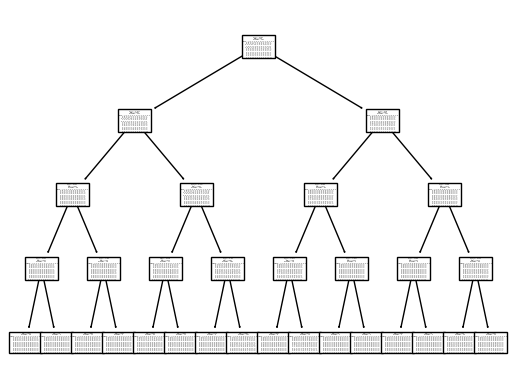

In [50]:
tree.plot_tree(dt_clf2)
plt.savefig('housing1.png')
plt.show()

In [51]:
acc2 = r2_score(y_test,y_pred2)
print('Accuracy: ',acc2*100)

Accuracy:  7.258069222267127
